<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/M3_lab39_svm_rev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGDClassifier and SVM Classifier

In [11]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
X, y = iris.data, iris.target

In [39]:
X2 = X[:,:2]


In [40]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

In [16]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

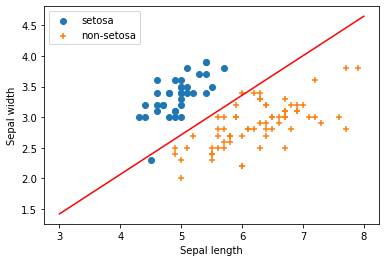

In [18]:
import matplotlib.pyplot as plt
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
xx = np.linspace(3,8,100)
yy = -a/b * xx - c/b
plt.plot(xx, yy, c='r')

In [19]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9809523809523809, 0.9777777777777777)

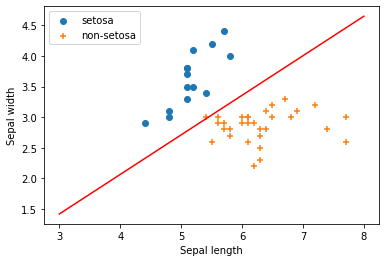

In [20]:
import matplotlib.pyplot as plt
markers = ['o', '+', '^']
for i in range(3):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
xx = np.linspace(3,8,100)
yy = -a/b * xx - c/b
plt.plot(xx, yy, c='r')

# multi-class ( 3 classes)

In [41]:
# 
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

X_train.shape, y_train.shape

((105, 2), (105,))

Coefficients:  [[-101.66059133  164.43904415]
 [  26.99896158  -91.72724126]
 [  83.91608392 -124.70862471]] [  58.38022904   72.68437116 -142.21031099]
multi-class score:  0.6


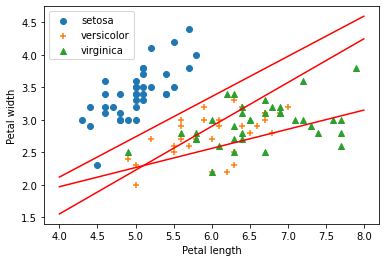

In [43]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Petal length")
plt.ylabel("Petal width")

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
print("Coefficients: ", clf.coef_, clf.intercept_)
print("multi-class score: ", clf.score(X_test, y_test))

for i in range(3):
    a = clf.coef_[i,0]
    b = clf.coef_[i,1]
    c = clf.intercept_[i]
    xx = np.linspace(4,8,100)
    yy = -a/b * xx - c/b
    plt.plot(xx, yy, c='r')

- test set 애 대해 경계선을 그려보자

(61600,)
(220, 280)


[]

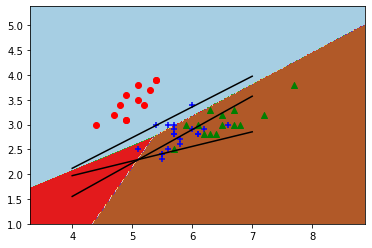

In [45]:
# contour
h = .02  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # column 으로 붙이기
print(Z.shape)
Z = Z.reshape(xx.shape)
print(Z.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
# plt.contourf(xx, yy, Z)      # Z: height values over which the contour is drawn
# plt.axis('tight')
#-----------------------

markers = ['o', '+', '^']
colors = "rbg"

for i in range(3):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i], c=colors[i])
   
for i in range(3):
    a = clf.coef_[i,0]
    b = clf.coef_[i,1]
    c = clf.intercept_[i]
    xx = np.linspace(4,7,100)
    yy = -a/b * xx - c/b
    plt.plot(xx, yy, c='k')

plt.plot()

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)  # one vs. rest

array([[12,  0,  0],
       [ 4,  1, 14],
       [ 0,  0, 14]])

In [47]:
clf.score(X_test, y_test)

0.6

- one-vs-all (one-vs-rest)

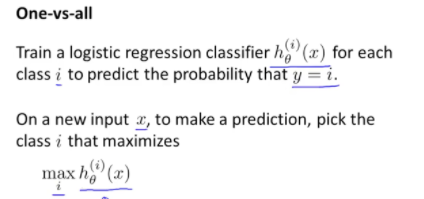

- another version for drawing

(61600,)
(220, 280)


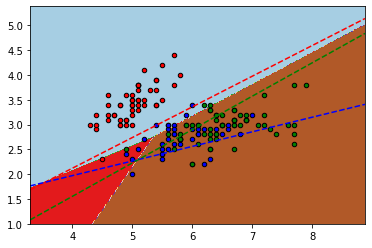

In [48]:
h = .02  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # column 으로 붙이기
print(Z.shape)
Z = Z.reshape(xx.shape)
print(Z.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) # Z: height values over which the contour is drawn
# plt.axis('tight')

for i, color in zip(clf.classes_, ['r','b','g']):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_   

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, ['r','b','g']):
    plot_hyperplane(i, color)

In [16]:
xx.shape, yy.shape

((220, 280), (220, 280))

In [17]:
xx, yy = np.meshgrid([1,2,3],[5,6])
print (xx, yy, xx.shape, yy.shape)
np.c_[xx.ravel(), yy.ravel()]

[[1 2 3]
 [1 2 3]] [[5 5 5]
 [6 6 6]] (2, 3) (2, 3)


array([[1, 5],
       [2, 5],
       [3, 5],
       [1, 6],
       [2, 6],
       [3, 6]])

## SVM
- C 가 증가하면 곡선이 디테일해지고
- gamma 가 증가하면 섬들이 많이 생긴다

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)
# X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

In [67]:
from sklearn.svm import SVC
# svm_clf = SVC(kernel="linear", C=float("inf"))    # infinitely large value
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
print(svm_clf.score(X_test, y_test))
y_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

0.9777777777777777


array([[ 9,  1],
       [ 0, 35]])

In [69]:
print(svm_clf.score(X_train, y_train))

1.0


In [70]:
svm_clf.coef_, svm_clf.intercept_

(array([[ 2.22222405, -2.5       ]]), array([-4.16667527]))

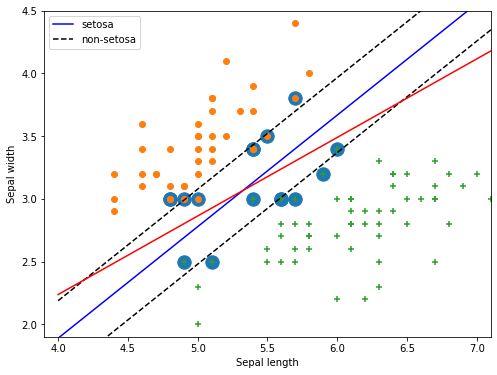

In [71]:
plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/(np.sqrt(w[0]**2 + w[1]**2))
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180)  # support vectors
# plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 
# print(svs)

plt.plot(XX, decision_boundary, "b-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")
markers = ['o', '+', '^'] 
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i] 
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa'] 
plt.legend(binary_names)
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
# 선형분류 결정 경계선
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
plt.plot(XX, (-a/b * XX - c/b), "r-")

In [24]:
svs.shape

(15, 2)

In [66]:
svm_clf.score(X_train, y_train)

0.6190476190476191

In [56]:
svm_clf.score(X_test, y_test)

0.9777777777777777

## 커널 기법

In [72]:
X_train.shape, y_train.shape

((105, 2), (105,))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

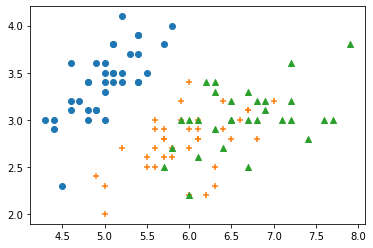

In [74]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

In [81]:
from sklearn.multiclass import OneVsRestClassifier
# SVC uses one-vs-one
classifier = OneVsRestClassifier(SVC(kernel='rbf', C=1000, gamma=10, probability=True))
                                    # enable prob estimates
classifier = classifier.fit(X_train, y_train)
classifier.score(X_train, y_train), classifier.score(X_test, y_test)

(0.9619047619047619, 0.6888888888888889)

In [79]:
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5555555555555556

In [80]:
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)
print("SVM score:", svm_clf.score(X_test, y_test))

SVM score: 0.6888888888888889


# 연습 with Iris dataset

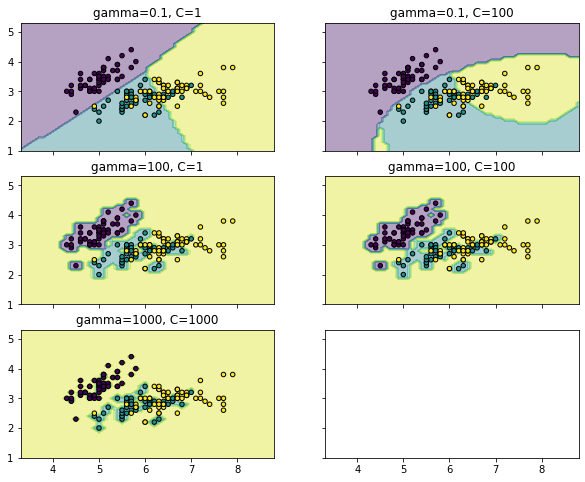

(0.82, 0.82, 0.92, 0.9266666666666666, 0.9266666666666666)

In [32]:
from itertools import product
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)
clf5.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# 확인
clf1.score(X, y), clf2.score(X, y), clf3.score(X, y), clf4.score(X, y), clf5.score(X,y)

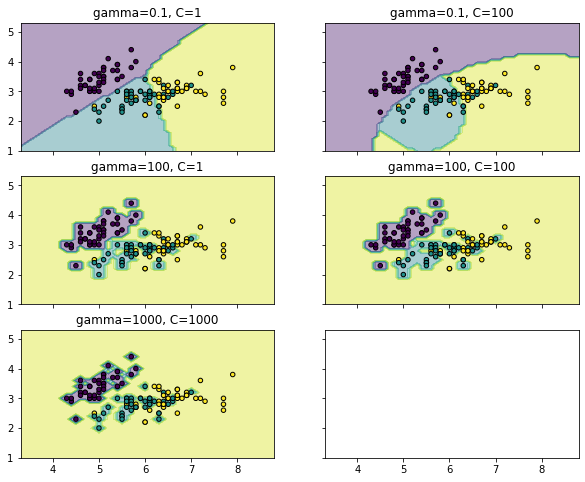

0.8416666666666667 0.8416666666666667 0.9333333333333333 0.9416666666666667 0.9416666666666667


In [33]:
# for train and test data
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_train, y_train), 
       clf2.score(X_train, y_train),
       clf3.score(X_train, y_train),
       clf4.score(X_train, y_train),
       clf5.score(X_train, y_train))

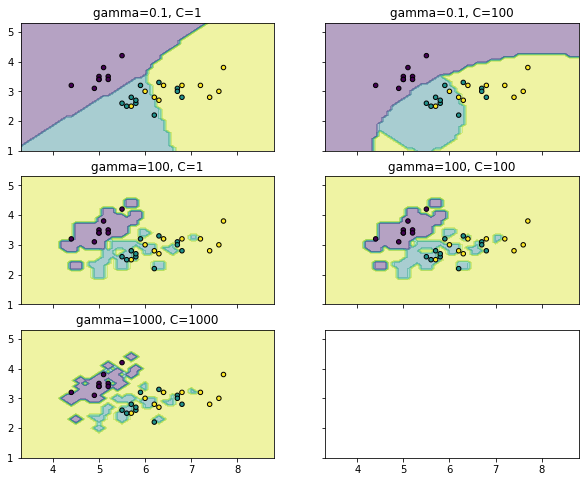

0.7666666666666667 0.7666666666666667 0.5666666666666667 0.5666666666666667 0.5333333333333333


In [34]:
# for test data
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_test, y_test), 
       clf2.score(X_test, y_test),
       clf3.score(X_test, y_test),
       clf4.score(X_test, y_test),
       clf5.score(X_test, y_test))

# One more
- binary classification
- target to predict is a XOR of the inputs
- illustrate decision function learned by SVC

In [35]:
xx, yy = np.meshgrid(np.linspace(1,5,5), np.linspace(1,3,3))
print(xx)
print(yy)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]


In [36]:
np.c_[xx.ravel(), yy.ravel()]

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [1., 2.],
       [2., 2.],
       [3., 2.],
       [4., 2.],
       [5., 2.],
       [1., 3.],
       [2., 3.],
       [3., 3.],
       [4., 3.],
       [5., 3.]])

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

In [38]:
xx.shape, yy.shape

((500, 500), (500, 500))

In [39]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [40]:
X.shape, Y.shape

((300, 2), (300,))

In [41]:
X[:3], Y[:3]

(array([[ 1.76405235,  0.40015721],
        [ 0.97873798,  2.2408932 ],
        [ 1.86755799, -0.97727788]]), array([False, False,  True]))

In [42]:
# fit the model
clf = svm.NuSVC(gamma='auto')   # uses 1./n_features
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
# ravel(): Return a contiguous flattened array.
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # evaluate the decision function

In [43]:
Z.shape

(250000,)

In [44]:
Z = Z.reshape(xx.shape)    # 500 x 500

In [45]:
np.c_[xx.ravel(), yy.ravel()].shape

(250000, 2)

- plt.imshow(): Display data as an image, i.e., on a 2D regular raster.

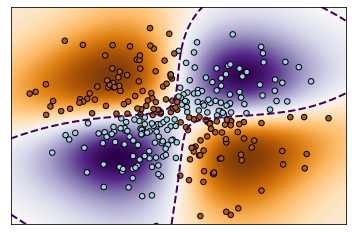

In [46]:
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

- ![image.png](attachment:image.png)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.SVC(gamma='auto', C)
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

SyntaxError: ignored

# One more
- https://broscoding.tistory.com/148

In [ ]:
!pip install mglearn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import mglearn

iris = load_iris()
col1, col2 = 0, 1
X = iris.data[:,[col1,col2]]
y = iris.target

In [ ]:
model = SVC()    # C=1.0, kernel='rbf', degree=3, gamma='scale' (1/(n_featutes * X.var())
model.fit (X, y)
mglearn.plots.plot_2d_classification(model, X, y)
mglearn.discrete_scatter(X[:,col1], X[:,col2], y)

In [ ]:
model = SVC(gamma=5, C=100)
model.fit (X, y)
mglearn.plots.plot_2d_classification(model, X, y)
mglearn.discrete_scatter(X[:,col1], X[:,col2], y)

In [ ]:
model = SVC(C=100, gamma=100)
model.fit (X, y)
mglearn.plots.plot_2d_classification(model, X, y)
mglearn.discrete_scatter(X[:,col1], X[:,col2], y)

# Plot the decision boundaries of a VotingClassifier
- from https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html\
    #sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py

In [ ]:
xx, yy = np.meshgrid(np.linspace(0,2,3), np.linspace(0,2,3))
print(xx, '\n', yy)
xx.shape

In [ ]:
xx.ravel()

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

In [ ]:
from itertools import product
list(product([0, 1], [0, 1]))

In [ ]:
print(__doc__)

In [ ]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=6)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=1e2, C=100, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
print(clf1.score(X, y),clf2.score(X, y),clf3.score(X, y),eclf.score(X, y))

# for exercise

In [2]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.c_[a, b]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
np.r_[a,b]

array([1, 2, 3, 4, 5, 6])

In [6]:
np.concatenate((a,b))

array([1, 2, 3, 4, 5, 6])

In [9]:
np.hstack([a,b])

array([1, 2, 3, 4, 5, 6])

In [10]:
np.vstack([a,b])

array([[1, 2, 3],
       [4, 5, 6]])